>> # CUSTOMER CHURN

# Business Understanding

Churn is the number of people who stop to use or subscribe to a particular service or product. 

Churn is high in industries where competition is high and consumers have multiple suppliers to choose from

Syriatel a leading mobile network provider in Syria is looking to build a model that will predict the possibilities of a customer churning or remaining in the company. And to know which variables mostly affect the possibility of a customer churning.

This information will then help Syriatel to know which Areas need improvement to avoid the possibilty of a customer leaving which leads to financial losses.

 # <u>OBJECTIVE</u>
 The objective of this project is to build and identify machine learning classification model that will correctly classify if a customer will churn or remain in Syriatel

 ## Other Objectives
- Knowing which variables have great impact on customer churn.
- knowing the relationship between customer churn and other variables.
- Using the features identified to predict future probabilities.

# Data Understanding

In [5]:
#for data manipulation and data reading 
import pandas as pd
#for mathematical computation
import numpy as np
#for visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#for classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error

# for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier




In [2]:
churn_data = pd.read_csv("customer_churn.csv")
churn_data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
churn_data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [5]:
#function to print out the different data types in our dataframe
def type_of_data(dataframe):
    integer_columns = dataframe.select_dtypes(include="int64")
    float_columns = dataframe.select_dtypes(include="float")
    string_columns = dataframe.select_dtypes(include="object")
    bool_columns = dataframe.select_dtypes(include= "bool")
    
    print(f"There are {len(integer_columns.columns)} numerical columns and the columns are: {list(integer_columns.columns)}")
    print(f"There are {len(float_columns.columns)} decimal columns and the columns are: {list(float_columns.columns)}")
    print(f"There are {len(string_columns.columns)} string columns and the columns are: {list(string_columns.columns)}")
    print(f"There are {len(bool_columns.columns)} boolean columns and the columns are: {list(bool_columns.columns)}")


In [6]:
type_of_data(churn_data)

There are 8 numerical columns and the columns are: ['account length', 'area code', 'number vmail messages', 'total day calls', 'total eve calls', 'total night calls', 'total intl calls', 'customer service calls']
There are 8 decimal columns and the columns are: ['total day minutes', 'total day charge', 'total eve minutes', 'total eve charge', 'total night minutes', 'total night charge', 'total intl minutes', 'total intl charge']
There are 4 string columns and the columns are: ['state', 'phone number', 'international plan', 'voice mail plan']
There are 1 boolean columns and the columns are: ['churn']


### Domain knowledge 

* state: string column about state the customer lives in
* account length: integer  column on number of days the customer has had an account
* area code: integer column about area code of the customer
* phone number: string column containing phone number of the customer
* international plan: string column if the customer has the international plan yes, otherwise no
* voice mail plan:string column if the customer has the voice mail plan yes, otherwise no
* number vmail messages:integer column containing number of voicemails the customer has sent
* total day minutes:float column containing total number of minutes the customer has been in calls during the day
* total day calls: integer column containing total number of calls the user has done during the day
* total day charge: float column containing total amount of money the customer was charged by the Telecom company for calls during the day
* total eve minutes: float column containing total number of minutes the customer has been in calls during the evening
* total eve calls: integer column containing total number of calls the customer has done during the evening
* total eve charge: float column containing total amount of money the customer was charged by the Telecom company for calls during the evening
* total night minutes: float column containg total number of minutes the customer has been in calls during the night
* total night calls: integer column containing total number of calls the customer has done during the night
* total night charge: float column containing total amount of money the customer was charged by the Telecom company for calls during the night
* total intl minutes: float column containing total number of minutes the user has been in international calls
* total intl calls: integer column containing total number of international calls the customer has done
* total intl charge: float column containing total amount of money the customer was charged by the Telecom company for international calls
* customer service calls: integer column containing number of calls the customer has made to customer service
* churn: boolean column containig true if the customer terminated their contract, otherwise false

From the above description it has been noticed that 'phone number' is the only unique identifier and it will be used to check for duplicates and then droped for data privacy and protecting customer data

'churn' will be our target variable because it is the ultimate aim of the company and it is a dependent variable.

### Data exploration

In [7]:
#Function for printing out shape of our data
def shape_of(Dataframe):
    shape = Dataframe.shape
    print(f"Our data has {shape[0]} rows and {shape[1]} columns")

In [8]:
shape_of(churn_data)

Our data has 3333 rows and 21 columns


In [9]:
# Numerical analysis of dataset
churn_data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Data quality

In [12]:
# missing value and duplicated values
def data_quality(Dataframe):
    missing_values =  Dataframe.isna().sum()
    total_missing = missing_values.sum()
    duplicated_value = Dataframe["phone number"].duplicated().sum()
    # "phone number" is used to check for duplicates because it is the only personal unique identifier
    
    print(f"This data has : {total_missing} missing values")
    print(f"This data has : {duplicated_value} duplicated values")
    

In [13]:
data_quality(churn_data)

This data has : 0 missing values
This data has : 0 duplicated values


'churn_data' has no missing or duplicated values

## outliers

<AxesSubplot:>

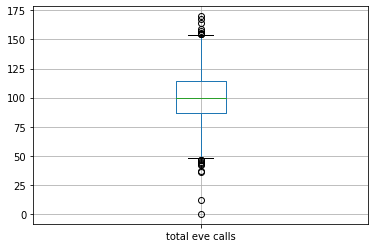

In [29]:
churn_data.boxplot('total eve calls')

c:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total eve calls'>

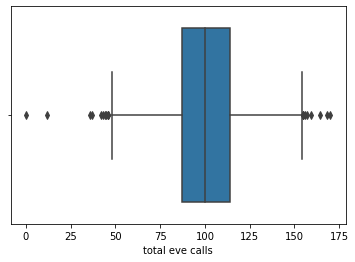

In [32]:
sns.boxplot(churn_data["total eve calls"])

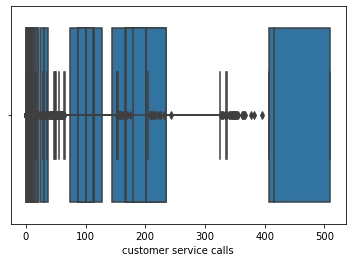

In [45]:
import seaborn as sns

for col in churn_data.select_dtypes(include=[np.number]):
    sns.boxplot(x=churn_data[col])


c:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

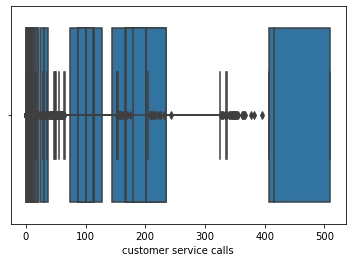

In [43]:


for col in churn_data.select_dtypes(include=[np.number]):
    sns.boxplot(churn_data[col])


## Explatory Data Analysis

In [ ]:
#Day of week vs Flight being delayed
a = dataset.groupby(['DayOfWeek','Class']).count().unstack('Class')['Time']
for i in range(a.shape[0]):
    numOfFlights = a.iloc[i,0]+a.iloc[i,1]
    for j in [0,1]:
        a.iloc[i,j] = a.iloc[i,j]/numOfFlights

#set labels for pie chart
pieChartLabels = ['Not delayed','Delayed']
#define Seaborn color palette to use
myColors = sns.color_palette('pastel')[0:5]
#display pie charts for the whole week   
for i in range(1,8):
    b = a.iloc[i-1,:]
    #create p

KeyboardInterrupt: 

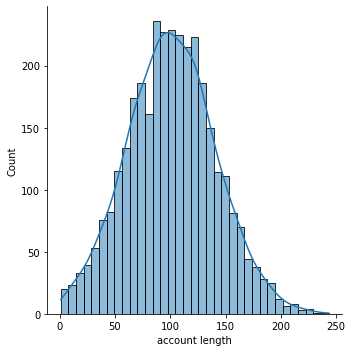

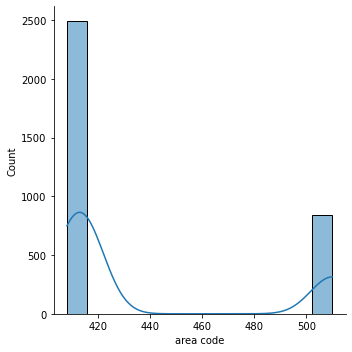

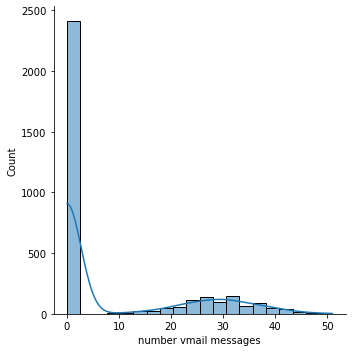

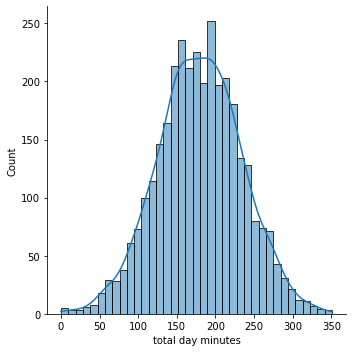

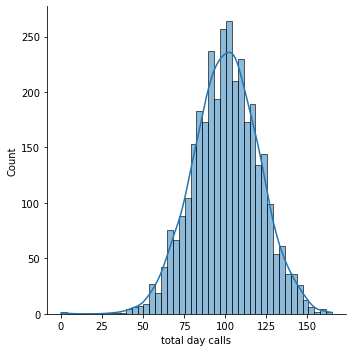

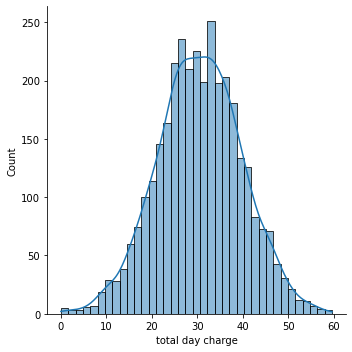

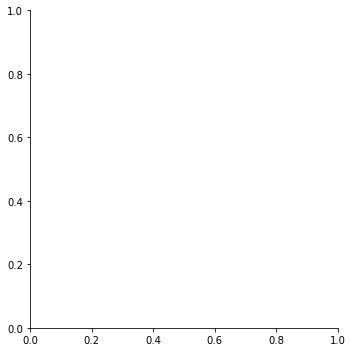

In [3]:
import pandas as pd
import seaborn as sns



# Check the distribution of each numerical column
for col in churn_data.select_dtypes(include=[np.number]):
  sns.displot(churn_data[col], kde= True)


In [12]:
churn_data.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

False    2850
True      483
Name: churn, dtype: int64


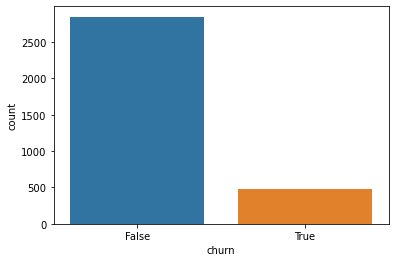

In [47]:
print(churn_data.churn.value_counts())
sns.countplot(data=churn_data, x='churn');

False    2850
True      483
Name: churn, dtype: int64


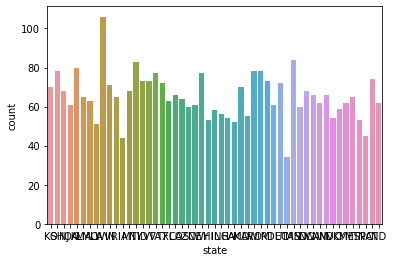

In [48]:
print(churn_data.churn.value_counts())
sns.countplot(data=churn_data, x='state');

False    2850
True      483
Name: churn, dtype: int64


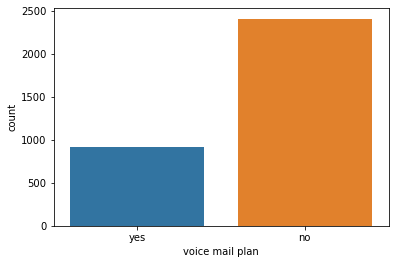

In [50]:
print(churn_data.churn.value_counts())
sns.countplot(data=churn_data, x='voice mail plan');

False    2850
True      483
Name: churn, dtype: int64


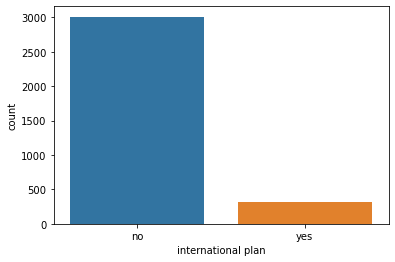

In [49]:
print(churn_data.churn.value_counts())
sns.countplot(data=churn_data, x='international plan');

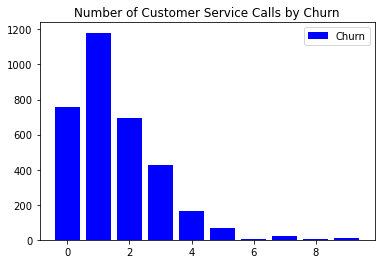

In [20]:
import matplotlib.pyplot as plt

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the data
ax.bar(churn_data['customer service calls'].unique(), churn_data['customer service calls'].value_counts(),
       color=['red' if x else 'blue' for x in churn_data['churn']],
       label='Churn')

# Add a legend
ax.legend()

# Add a title
ax.set_title('Number of Customer Service Calls by Churn')

# Show the plot
plt.show()


# Data pre processing

In [62]:

churn_data = churn_data.drop(['state', 'area code', 'phone number'], axis=1)


In [54]:
churn_data["area code"].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

In [73]:
churn_data.shape

(3333, 18)

# Data processing for modellingn

In [57]:
churn_data['churn'] = churn_data['churn'].astype(int)
churn_data['churn']

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 3333, dtype: int32

In [66]:
churn_data['voice mail plan'] = churn_data['voice mail plan'].map({'yes': 1, 'no': 0})

# International Plan
churn_data['international plan'] = churn_data['international plan'].map({'yes': 1, 'no': 0})


# Modeling

# 3.1 preparing data for modeling

In [75]:
X = churn_data.drop(['churn'], axis=1)
y = churn_data['churn']

# split our data for modeling  split it  75training - 25testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=29)


After splitting the data into training and test sets, we use the `starndardScaler()` to fit and transform `X_train` and transform `X_test`. 

> NOTE: You want to **fit and transform** only the **training** data because in a real-world setting, you only have access to this data. You can then use the same scalar object to **transform** the **test** data. If you first transform the data and then split into training and test sets this leads to **data leakage**. 

In [77]:
# Scaling data using standardScaler
from sklearn.preprocessing import StandardScaler
#instantiate starndardScaler
scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




# 3.2 Modelling

In [82]:
from sklearn.linear_model import LogisticRegression
# building the baseline model
# instantiate logistic regression with random state 29
first_linear_model = LogisticRegression(random_state=29)


first_linear_model.fit(X_train_scaled, y_train)
y_test_hat = first_linear_model.predict(X_test_scaled)
y_train_hat = first_linear_model.predict(X_train_scaled)


In [79]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
base_cv = cross_val_score(first_linear_model, X_train_scaled, y_train)

base_cv

array([0.884     , 0.874     , 0.84      , 0.86      , 0.85971944])

In [103]:
base_cv.mean()

0.863543887775551

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=model_log.classes_)
disp.plot(cmap=plt.cm.Blues)


# what i wanted tyo use.

In [104]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_train_hat)
test_mse = mean_squared_error(y_test, y_test_hat)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 0.13485394157663066
Test Mean Squared Error: 0.12829736211031176


In [105]:
(train_mse + test_mse)/2

0.1315756518434712

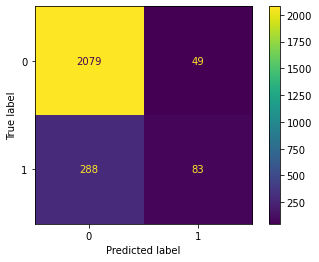

In [80]:
# Displaying a confusion matrix
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(first_linear_model, X_train_scaled, y_train);

In [81]:
first_linear_model = classification_report(y_test, y_base_pred)
print(first_linear_model)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       722
           1       0.56      0.21      0.31       112

    accuracy                           0.87       834
   macro avg       0.72      0.59      0.62       834
weighted avg       0.84      0.87      0.85       834



In [83]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_train_hat)
test_mse = mean_squared_error(y_test, y_test_hat)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 0.13485394157663066
Test Mean Squared Error: 0.12829736211031176


# KNN

In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train_scaled, y_train)
knn_y_pred = knn.predict(X_test_scaled)
knn_y_pred_proba = knn.predict_proba(X_test_scaled)

knn_y_pred_proba

array([[0.75, 0.25],
       [1.  , 0.  ],
       [0.5 , 0.5 ],
       ...,
       [1.  , 0.  ],
       [0.75, 0.25],
       [0.5 , 0.5 ]])

In [92]:
# scoring
knn_score = knn.score(X_train_scaled, y_train)
knn_score

0.905562224889956

In [93]:
# Cross Validation
knn_cv = cross_val_score(knn, X_train, y_train)
knn_cv

array([0.872     , 0.87      , 0.868     , 0.88      , 0.85971944])

In [94]:
# Report 
knn_report = classification_report(y_test, knn_y_pred)
print(knn_report)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       722
           1       0.84      0.19      0.31       112

    accuracy                           0.89       834
   macro avg       0.86      0.59      0.62       834
weighted avg       0.88      0.89      0.85       834



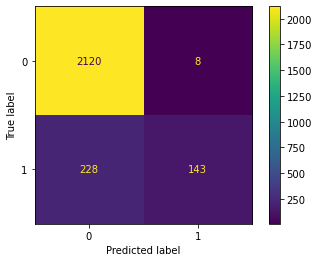

In [95]:
ConfusionMatrixDisplay.from_estimator(knn, X_train_scaled, y_train)

# decision tree 

In [89]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=29)

tree.fit(X_train_scaled, y_train)
y_tree_pred = tree.predict(X_test_scaled)

# Scoring on trained data
tree_train_score = tree.score(X_train_scaled, y_train)
print('Trained data score: ', tree_train_score)

# Scoring on test data
tree_test_score = tree.score(X_test_scaled, y_test)
print('Test data score: ', tree_test_score)

Trained data score:  1.0
Test data score:  0.934052757793765


In [87]:
# Cross Validation
tree_cv = cross_val_score(tree, X_train_scaled, y_train)
tree_cv

array([0.904     , 0.904     , 0.912     , 0.91      , 0.91583166])

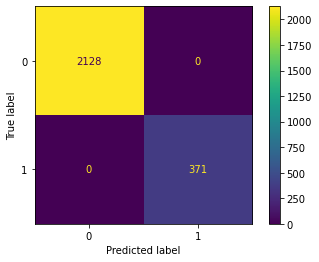

In [88]:
# Train Confusion Matrix
ConfusionMatrixDisplay.from_estimator(tree, X_train_scaled, y_train);

In [90]:
# Report
tree_report = classification_report(y_test, y_tree_pred)
print(tree_report)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       722
           1       0.74      0.78      0.76       112

    accuracy                           0.93       834
   macro avg       0.85      0.87      0.86       834
weighted avg       0.94      0.93      0.93       834



# random forest

In [4]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=4, random_state=132)

clf.fit(X_train_scaled, y_train)

y_clf_pred = clf.predict(X_test_scaled)

NameError: name 'X_train_scaled' is not defined

In [98]:
clf_score = clf.score(X_train_scaled, y_train)
clf_score

c:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.8519407763105242

In [99]:
# Cross validation
clf_cv = cross_val_score(clf, X_train_scaled, y_train)
clf_cv

array([0.914     , 0.918     , 0.928     , 0.928     , 0.92785571])

c:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


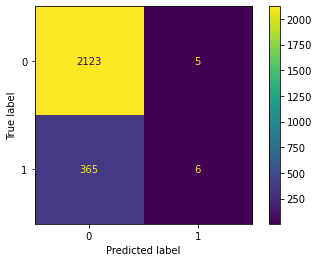

In [100]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(clf, X_train_scaled, y_train);

In [101]:
# Report
clf_report = classification_report(y_test, y_clf_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       722
           1       1.00      0.02      0.04       112

    accuracy                           0.87       834
   macro avg       0.93      0.51      0.48       834
weighted avg       0.89      0.87      0.81       834



In [84]:
from sklearn.metrics import roc_curve, auc

# Scikit-learn's built in roc_curve method returns the fpr, tpr, and thresholds
# for various decision boundaries given the case member probabilites

# First calculate the probability scores of each of the datapoints:
y_score = first_linear_model.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

c:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
import missingno as msn

<AxesSubplot:>

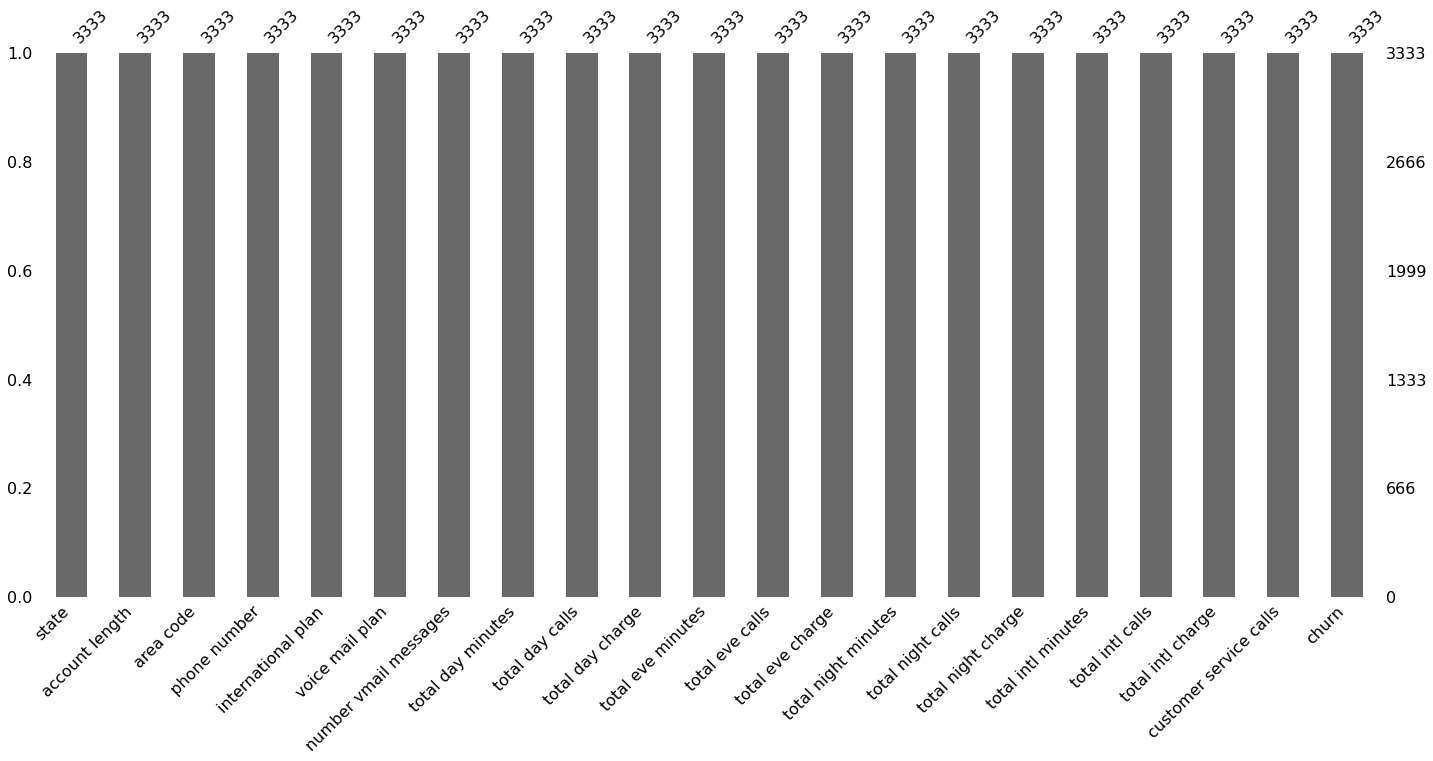

In [40]:
msn.bar(churn_data)

In [ ]:
pipe = Pipeline([('mms', MinMaxScaler()),
                 ('tree', DecisionTreeClassifier(random_state=123))])

# Create the grid parameter
grid = [{'tree__max_depth': [None, 2, 6, 10], 
         'tree__min_samples_split': [5, 10]}]


# Create the grid, with "pipe" as the estimator
gridsearch = GridSearchCV(estimator=pipe, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=5)

# Evaluation

# FIONE TUNING

# under feature selection

In [ ]:
rfe_cv = RFECV(LinearRegression(), cv=15)
X_rfe_train = rfe_cv.fit_transform(X_poly_train, y_train)
X_rfe_test = rfe_cv.transform(X_poly_test)
lr = LinearRegression()
lr.fit(X_rfe_train, y_train)

rfe_r2, rfe_rmse = run_model(lr, X_rfe_train, X_rfe_test, y_train, y_test)
print('\n----------------\n')
print(f"{X_rfe_train.shape[1]} out of {X_poly_train.shape[1]} features used")
print('Baseline R-Squared:', round(poly_r2, 2))
print('Reduced R-Squared: ', round(rfe_r2, 2)

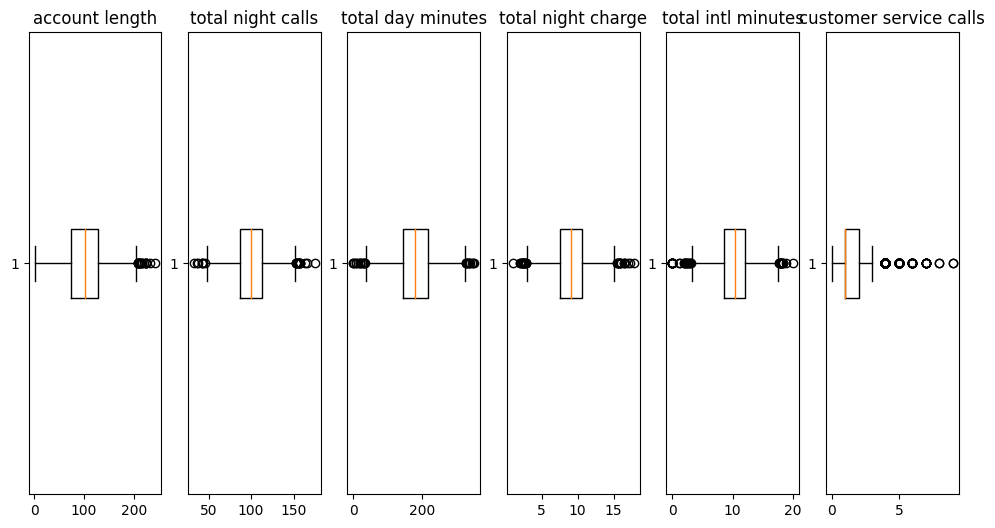

In [ ]:
num_cols = ["account length", "total night calls", "total day minutes", "total night charge","total intl minutes", "customer service calls"]
# Create a boxplot for each numerical column
fig, axes = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(12, 6))
for i, col in enumerate(num_cols):
    axes[i].boxplot(df[col], vert=False)
    axes[i].set_title(col)

plt.show()


# df.boxplot(columns=[col for col in df.select_dtypes(include='int').columns])